# Análisis Exploratorio de Datos (EDA)
## Amazon Customer Reviews Dataset

Este notebook contiene el análisis exploratorio inicial del dataset de reseñas de Amazon.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')  # Cambiamos 'seaborn' por 'default'
sns.set_theme()  # Esto aplicará el estilo de seaborn de una manera más moderna
%matplotlib inline

In [3]:
# Cargar el dataset
df = pd.read_csv('../data/raw/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')


In [4]:

# Mostrar las primeras filas y la información básica del dataset
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación del Dataset:")
df.info()

print("\nEstadísticas Descriptivas:")
display(df.describe())



Primeras 5 filas del dataset:


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.do

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [5]:
# Mostrar todas las columnas disponibles
print("\nColumnas en el dataset:")
print(df.columns.tolist())


Columnas en el dataset:
['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']


In [6]:
# Mostrar una muestra de las reseñas
print("Muestra de 5 reseñas:")
for i, review in enumerate(df['reviews.text'].head(), 1):
    print(f"\nReseña {i}:")
    print(review[:200], "..." if len(review) > 200 else "")

Muestra de 5 reseñas:

Reseña 1:
I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work. 

Reseña 2:
Bulk is always the less expensive way to go for products like these 

Reseña 3:
Well they are not Duracell but for the price i am happy. 

Reseña 4:
Seem to work as well as name brand batteries at a much better price 

Reseña 5:
These batteries are very long lasting the price is great. 


# Analisis de columnas en todos los archivos

In [16]:
# Analizar los archivos en data/raw
import os
from IPython.display import display, HTML
import pandas as pd

print("Analizando columnas en todos los archivos:")

# Obtener todos los archivos CSV
raw_files = [f for f in os.listdir('../data/raw') if f.endswith('.csv')]

# Diccionario para almacenar todas las columnas únicas
all_columns = {}

# Recorrer cada archivo para recopilar columnas
for file in raw_files:
    temp_df = pd.read_csv(f'../data/raw/{file}', nrows=5)
    
    # Agregar información de cada columna
    for col in temp_df.columns:
        if col not in all_columns:
            all_columns[col] = {
                'archivos': [],
                'ejemplos': {}
            }
        all_columns[col]['archivos'].append(file)
        # Guardar ejemplos de valores para cada columna y archivo
        all_columns[col]['ejemplos'][file] = temp_df[col].iloc[0]

# Crear DataFrame con la información consolidada
columns_info = []
for col, info in all_columns.items():
    column_info = {
        'Columna': col,
        'En Todos': 'Sí' if len(info['archivos']) == len(raw_files) else 'No'
    }
    
    # Agregar información de presencia en archivos y ejemplos
    for file in raw_files:
        if file in info['archivos']:
            ejemplo = str(info['ejemplos'][file])
            if len(ejemplo) > 50:
                ejemplo = ejemplo[:47] + "..."
            column_info[file] = f"X\nEj: {ejemplo}"
        else:
            column_info[file] = '-'
    
    columns_info.append(column_info)

# Convertir a DataFrame y mostrar
columns_df = pd.DataFrame(columns_info)

# Mostrar tabla con estilo
display(HTML("<h3>Análisis de Columnas en Todos los Archivos</h3>"))
display(columns_df.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'font-size': '11px'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},
    {'selector': '', 'props': [('border', '1px solid grey')]},
    {'selector': 'td', 'props': [('max-width', '300px'), ('word-wrap', 'break-word')]}
]))

print(f"\nTotal de columnas únicas encontradas: {len(all_columns)}")
print(f"Total de archivos analizados: {len(raw_files)}")


Analizando columnas en todos los archivos:


,Columna,En Todos,Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv,1429_1.csv,Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
0,id,Sí,X Ej: AVpgNzjwLJeJML43Kpxn,X Ej: AVqkIhwDv8e3D1O-lebb,X Ej: AVqVGZNvQMlgsOJE6eUY
1,dateAdded,No,X Ej: 2015-10-30T08:59:32Z,-,X Ej: 2017-03-03T16:56:05Z
2,dateUpdated,No,X Ej: 2019-04-25T09:08:16Z,-,X Ej: 2018-10-25T16:36:31Z
3,name,Sí,X Ej: AmazonBasics AAA Performance Alkaline Batteries...,"X Ej: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...","X Ej: Amazon Kindle E-Reader 6"" Wifi (8th Generation,..."
4,asins,Sí,"X Ej: B00QWO9P0O,B00LH3DMUO",X Ej: B01AHB9CN2,X Ej: B00ZV9PXP2
5,brand,Sí,X Ej: Amazonbasics,X Ej: Amazon,X Ej: Amazon
6,categories,Sí,"X Ej: AA,AAA,Health,Electronics,Health & Household,Ca...","X Ej: Electronics,iPad & Tablets,All Tablets,Fire Tab...","X Ej: Computers,Electronics Features,Tablets,Electron..."
7,primaryCategories,No,X Ej: Health & Beauty,-,X Ej: Electronics
8,imageURLs,No,X Ej: https://images-na.ssl-images-amazon.com/images/...,-,X Ej: https://pisces.bbystatic.com/image2/BestBuy_US/...
9,keys,Sí,"X Ej: amazonbasics/hl002619,amazonbasicsaaaperformanc...","X Ej: 841667104676,amazon/53004484,amazon/b01ahb9cn2,...",X Ej: allnewkindleereaderblack6glarefreetouchscreendi...



Total de columnas únicas encontradas: 27
Total de archivos analizados: 3


# Consolidar los archivos

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

def load_and_process_chunk(chunk):
    """
    Procesa un chunk de datos seleccionando y limpiando las columnas relevantes.
    """
    # Columnas base que deberían estar en todos los archivos
    base_columns = [
        'id',                  # ID del producto
        'name',                # Nombre del producto
        'brand',               # Marca
        'categories',          # Categorías
        'reviews.id',          # ID de la reseña
        'reviews.date',        # Fecha de la reseña
        'reviews.doRecommend', # Recomendación
        'reviews.numHelpful',  # Votos útiles
        'reviews.rating',      # Calificación
        'reviews.text',        # Texto de la reseña
        'reviews.title',       # Título de la reseña
        'reviews.username'     # Usuario
    ]
    
    # Verificar qué columnas están disponibles
    available_columns = [col for col in base_columns if col in chunk.columns]
    print(f"Columnas disponibles: {available_columns}")
    
    # Seleccionar columnas disponibles
    df = chunk[available_columns].copy()
    
    # Limpieza básica
    if 'reviews.text' in df.columns:
        df['reviews.text'] = df['reviews.text'].fillna('')
    if 'reviews.title' in df.columns:
        df['reviews.title'] = df['reviews.title'].fillna('')
    if 'reviews.rating' in df.columns:
        df['reviews.rating'] = df['reviews.rating'].fillna(0)
    if 'reviews.numHelpful' in df.columns:
        df['reviews.numHelpful'] = df['reviews.numHelpful'].fillna(0)
    
    # Convertir fechas si está disponible
    if 'reviews.date' in df.columns:
        df['reviews.date'] = pd.to_datetime(df['reviews.date'], errors='coerce')
    
    # Agregar columnas derivadas
    if 'reviews.text' in df.columns:
        df['text_length'] = df['reviews.text'].str.len()
    if 'reviews.rating' in df.columns:
        df['sentiment'] = df['reviews.rating'].apply(
            lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral'
        )
        df['sentiment_numeric'] = df['reviews.rating'].apply(
            lambda x: 2 if x > 3 else 0 if x < 3 else 1
        )
    
    return df

def consolidate_datasets(input_files, output_file, chunksize=10000):
    """
    Consolida múltiples archivos CSV en uno solo, procesando por chunks.
    
    Args:
        input_files (list): Lista de rutas a los archivos CSV de entrada
        output_file (str): Ruta donde se guardará el archivo consolidado
        chunksize (int): Tamaño del chunk para procesamiento
    """
    # Crear directorio si no existe
    output_path = Path(output_file).parent
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Procesar cada archivo
    first_chunk = True
    for file in input_files:
        print(f"\nProcesando archivo: {file}")
        
        try:
            # Leer y procesar en chunks
            for i, chunk in enumerate(pd.read_csv(file, chunksize=chunksize)):
                processed_chunk = load_and_process_chunk(chunk)
                
                # Guardar
                mode = 'w' if first_chunk else 'a'
                header = first_chunk
                processed_chunk.to_csv(output_file, mode=mode, header=header, index=False)
                first_chunk = False
                
                # Mostrar progreso
                if (i + 1) % 10 == 0:
                    print(f"Procesados {(i + 1) * chunksize} registros...")
            
            print(f"Archivo {file} procesado exitosamente")
            
        except Exception as e:
            print(f"Error procesando archivo {file}: {str(e)}")
            continue

if __name__ == "__main__":
    # Definir archivos de entrada y salida
    input_files = [
        'data/raw/1429_1.csv',
        'data/raw/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv',
        'data/raw/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
    ]
    
    output_file = 'data/processed/consolidated_reviews.csv'
    
    print("Iniciando proceso de consolidación...")
    print(f"Archivos a procesar: {len(input_files)}")
    
    # Ejecutar consolidación
    consolidate_datasets(input_files, output_file)
    print(f"\nProceso completado. Datos consolidados guardados en: {output_file}") 

# Análisis Exploratorio Post-Consolidación
## Amazon Customer Reviews Dataset

Este notebook analiza el dataset consolidado para entender mejor nuestros datos y preparar la fase de modelado.
  

In [17]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import warnings

# Ignorar warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
%matplotlib inline

# Mostrar todas las columnas en los DataFrames
pd.set_option('display.max_columns', None)

In [18]:
# Cargar el dataset consolidado
df = pd.read_csv('../data/processed/consolidated_reviews.csv')
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (67992, 14)


,id,name,brand,categories,reviews.id,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,text_length,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143,positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman,75,positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131,positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-13 00:00:00+00:00,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593,positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,2017-01-12 00:00:00+00:00,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613,positive


 ## 1. Análisis General
 ### 1.1 Estadísticas Básicas

In [19]:
# Información general del dataset
print("\nInformación del Dataset:")
df.info()

print("\nEstadísticas Descriptivas:")
df.describe(include='all')


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67992 entries, 0 to 67991
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67992 non-null  object 
 1   name                 61232 non-null  object 
 2   brand                67992 non-null  object 
 3   categories           67992 non-null  object 
 4   reviews.id           71 non-null     float64
 5   reviews.date         67808 non-null  object 
 6   reviews.doRecommend  55152 non-null  object 
 7   reviews.numHelpful   67992 non-null  float64
 8   reviews.rating       67992 non-null  float64
 9   reviews.text         67991 non-null  object 
 10  reviews.title        67973 non-null  object 
 11  reviews.username     67979 non-null  object 
 12  text_length          67992 non-null  int64  
 13  sentiment            67992 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 7.3+ MB

E

,id,name,brand,categories,reviews.id,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,text_length,sentiment
count,67992,61232,67992,67992,7.100000e+01,67808,55152,67992.000000,67992.000000,67991,67973,67979,67992.000000,67992
unique,92,125,8,111,NaN,1330,2,NaN,NaN,46909,25788,37570,NaN,3
top,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",NaN,2017-01-23 00:00:00+00:00,True,NaN,NaN,good,Five Stars,ByAmazon Customer,NaN,positive
freq,10966,10966,49854,10966,NaN,1314,52800,NaN,NaN,61,4100,889,NaN,62547
mean,NaN,NaN,NaN,NaN,1.837463e+08,NaN,NaN,0.464805,4.553859,NaN,NaN,NaN,150.242705,NaN
std,NaN,NaN,NaN,NaN,2.371858e+07,NaN,NaN,10.447004,0.831007,NaN,NaN,NaN,196.710631,NaN
min,NaN,NaN,NaN,NaN,1.082112e+08,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.843760e+08,NaN,NaN,0.000000,4.000000,NaN,NaN,NaN,64.000000,NaN
50%,NaN,NaN,NaN,NaN,1.880757e+08,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,99.000000,NaN
75%,NaN,NaN,NaN,NaN,1.987126e+08,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,175.000000,NaN


### 1.2 Análisis de Valores Faltantes

Análisis de Valores Faltantes:


,Missing Values,Percentage
reviews.id,67921,99.895576
reviews.doRecommend,12840,18.884575
name,6760,9.942346
reviews.date,184,0.270620
reviews.title,19,0.027944
reviews.username,13,0.019120
reviews.text,1,0.001471
id,0,0.000000
brand,0,0.000000
categories,0,0.000000


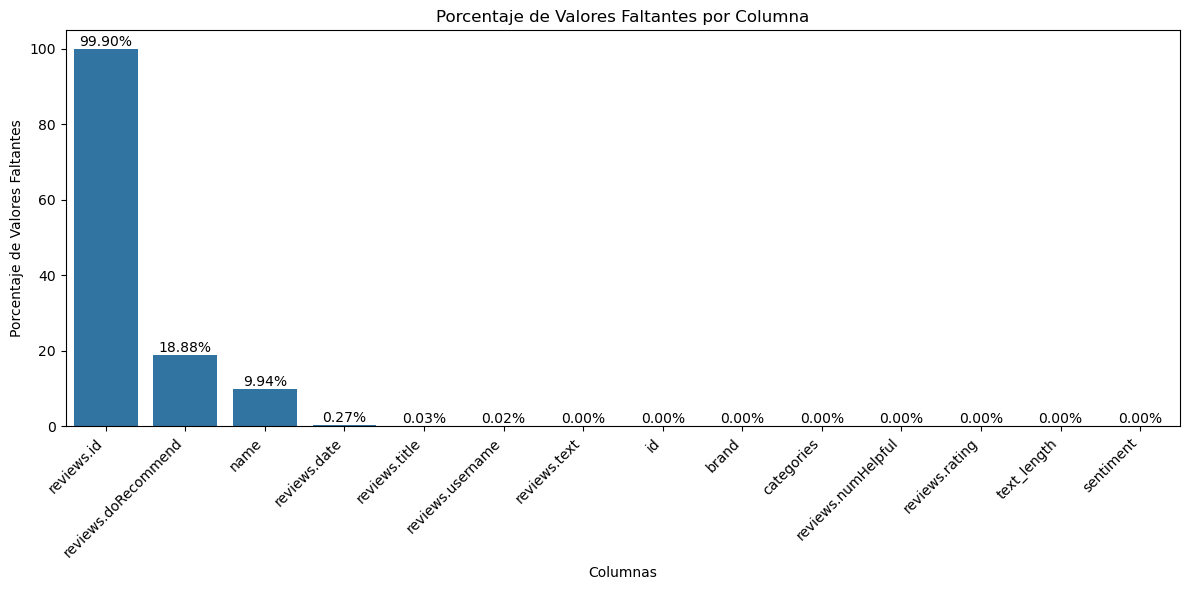

In [22]:
# Visualizar valores faltantes
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
}).sort_values('Percentage', ascending=False)

print("Análisis de Valores Faltantes:")
display(missing_df)

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=missing_df.reset_index(), x='index', y='Percentage')

# Añadir etiquetas de porcentaje sobre cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.tight_layout()
plt.show()

## 2. Análisis de Sentimiento
### 2.1 Distribución de Ratings y Sentimiento

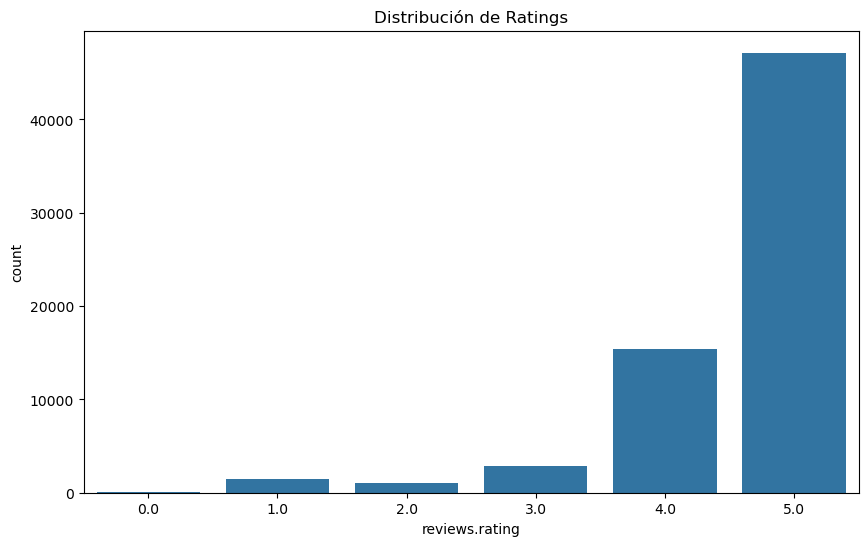

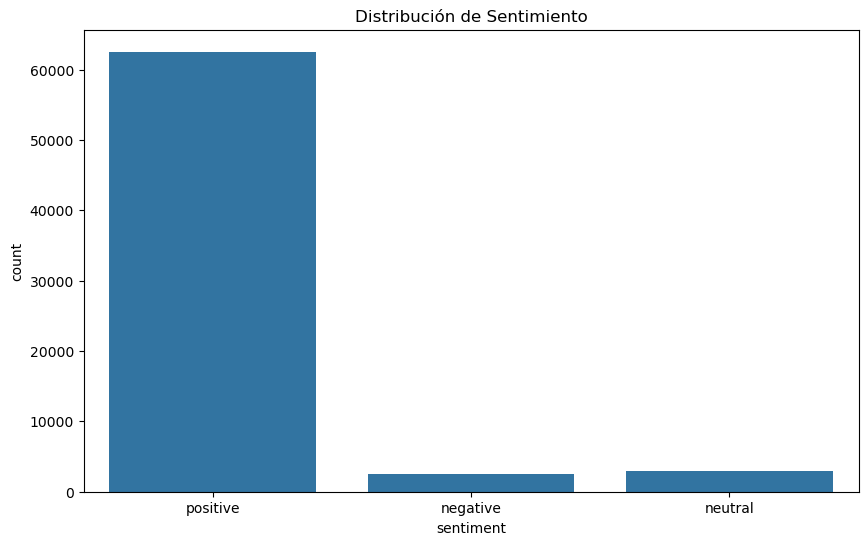

In [ ]:
# Distribución de ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reviews.rating')
plt.title('Distribución de Ratings')
plt.show()

# Distribución de sentimiento 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribución de Sentimiento')
plt.show()

### 2.2 Análisis de Texto

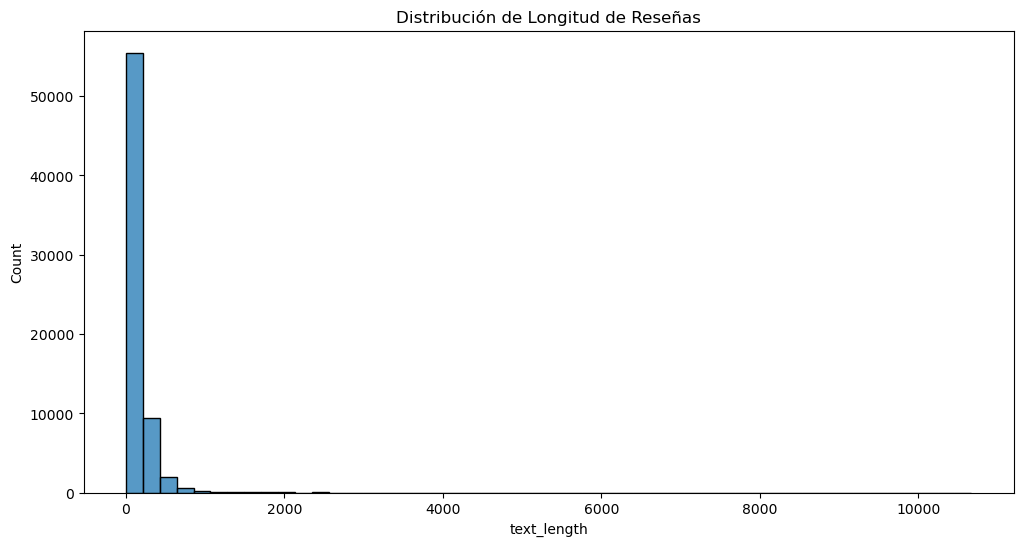

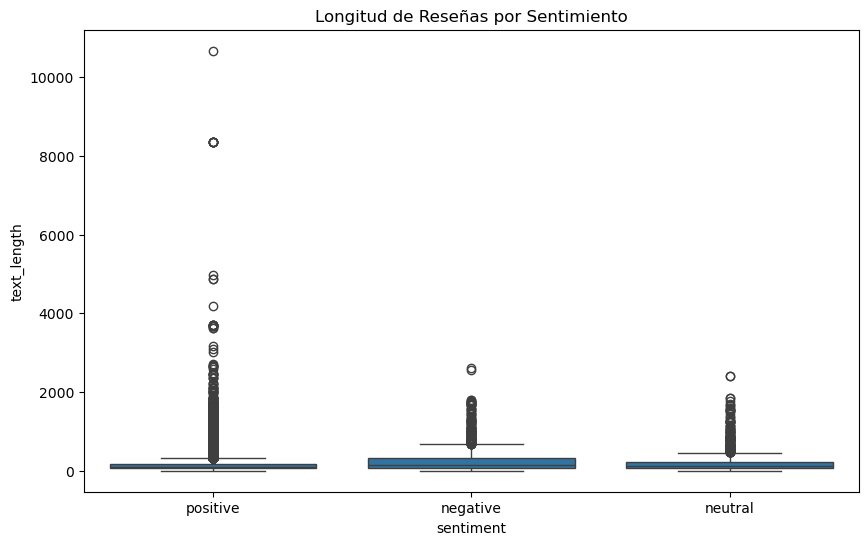

In [ ]:
# Distribución de longitud de reseñas
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribución de Longitud de Reseñas')
plt.show()

# Longitud promedio por sentimiento 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.title('Longitud de Reseñas por Sentimiento')
plt.show()

## 3. Análisis por Categorías

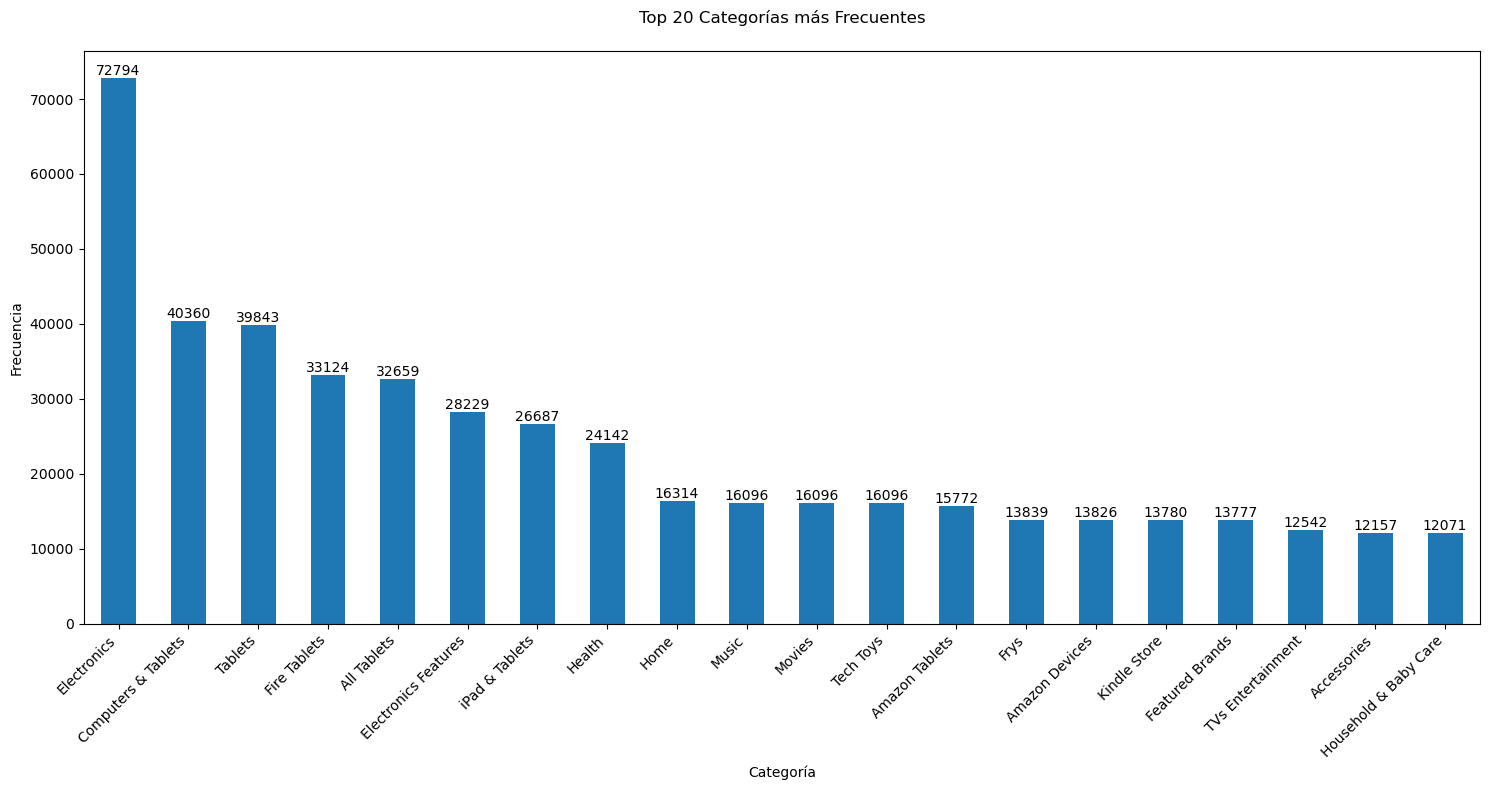

In [ ]:
# Procesar categorías
def get_categories(cat_string):
    if pd.isna(cat_string):
        return []
    # Manejar diferentes formatos de separación
    if ',' in str(cat_string):
        return [c.strip() for c in str(cat_string).split(',')]
    elif '|' in str(cat_string):
        return [c.strip() for c in str(cat_string).split('|')]
    else:
        return [str(cat_string).strip()]

# Obtener todas las categorías únicas y contar frecuencias
all_categories = []
for cats in df['categories'].dropna():
    all_categories.extend(get_categories(cats))

# Crear DataFrame con conteos
category_counts = pd.Series(all_categories).value_counts()

# Visualizar top 20 categorías
plt.figure(figsize=(15, 8))
ax = category_counts.head(20).plot(kind='bar')
plt.title('Top 20 Categorías más Frecuentes', pad=20)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mejorar formato de etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir valores sobre las barras
for i, v in enumerate(category_counts.head(20)):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

## 4. Análisis Temporal

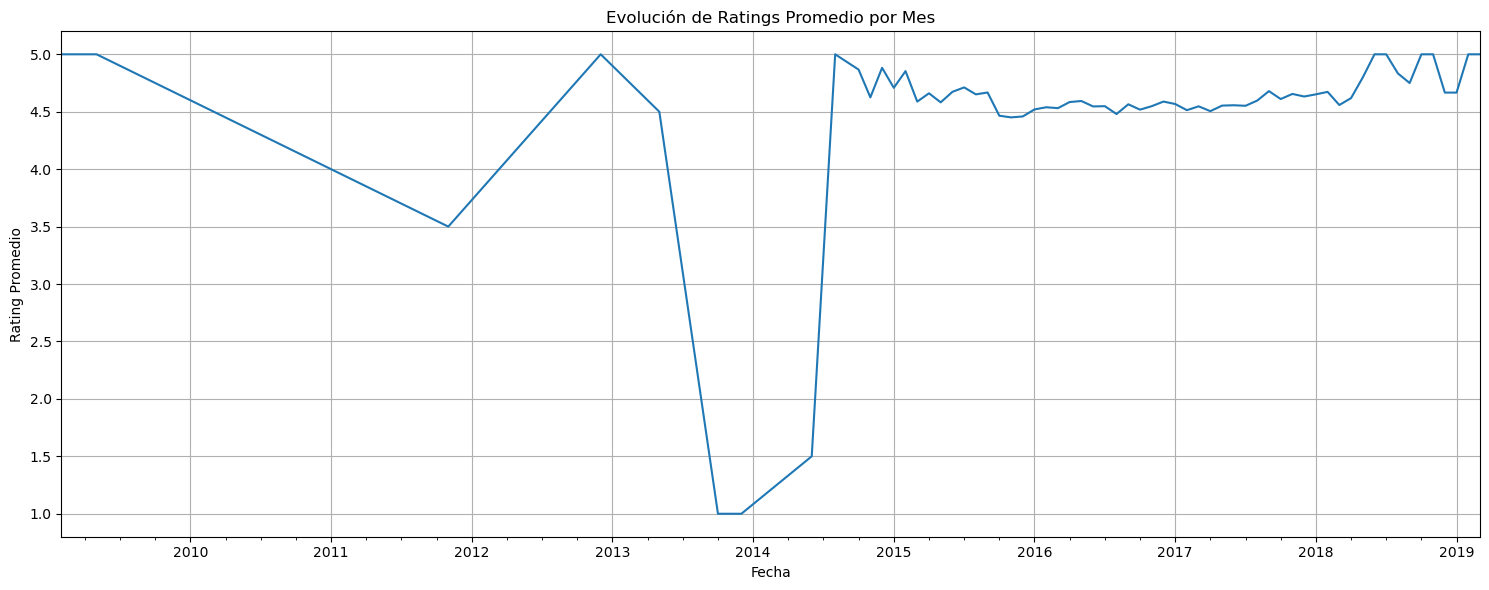

In [ ]:
# Convertir a datetime si no lo está ya
df['reviews.date'] = pd.to_datetime(df['reviews.date'])

# Agregar por mes
monthly_ratings = df.groupby(df['reviews.date'].dt.to_period('M'))['reviews.rating'].mean()

# Visualizar tendencia temporal
plt.figure(figsize=(15, 6))
monthly_ratings.plot()
plt.title('Evolución de Ratings Promedio por Mes')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Análisis de Marcas

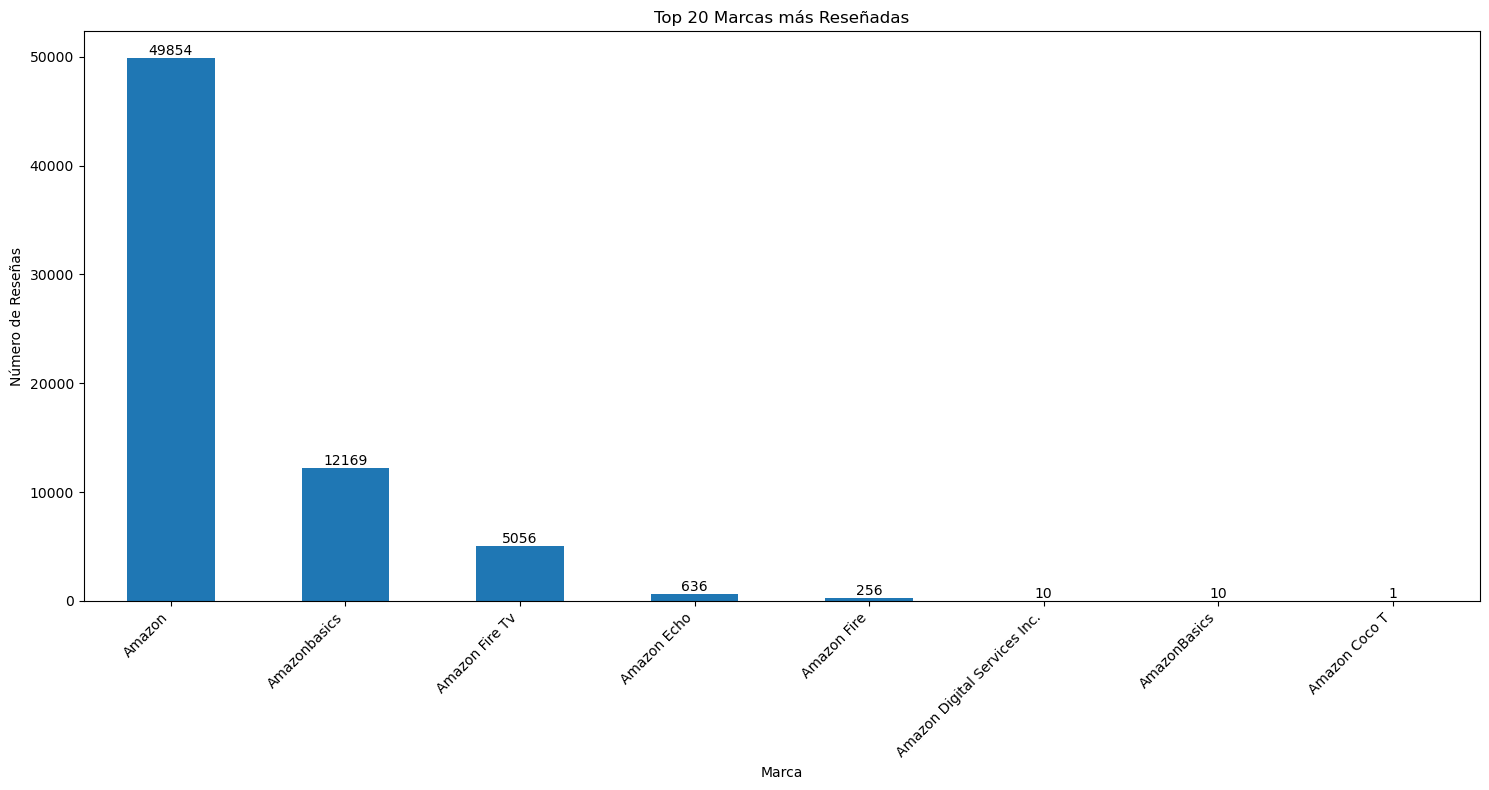

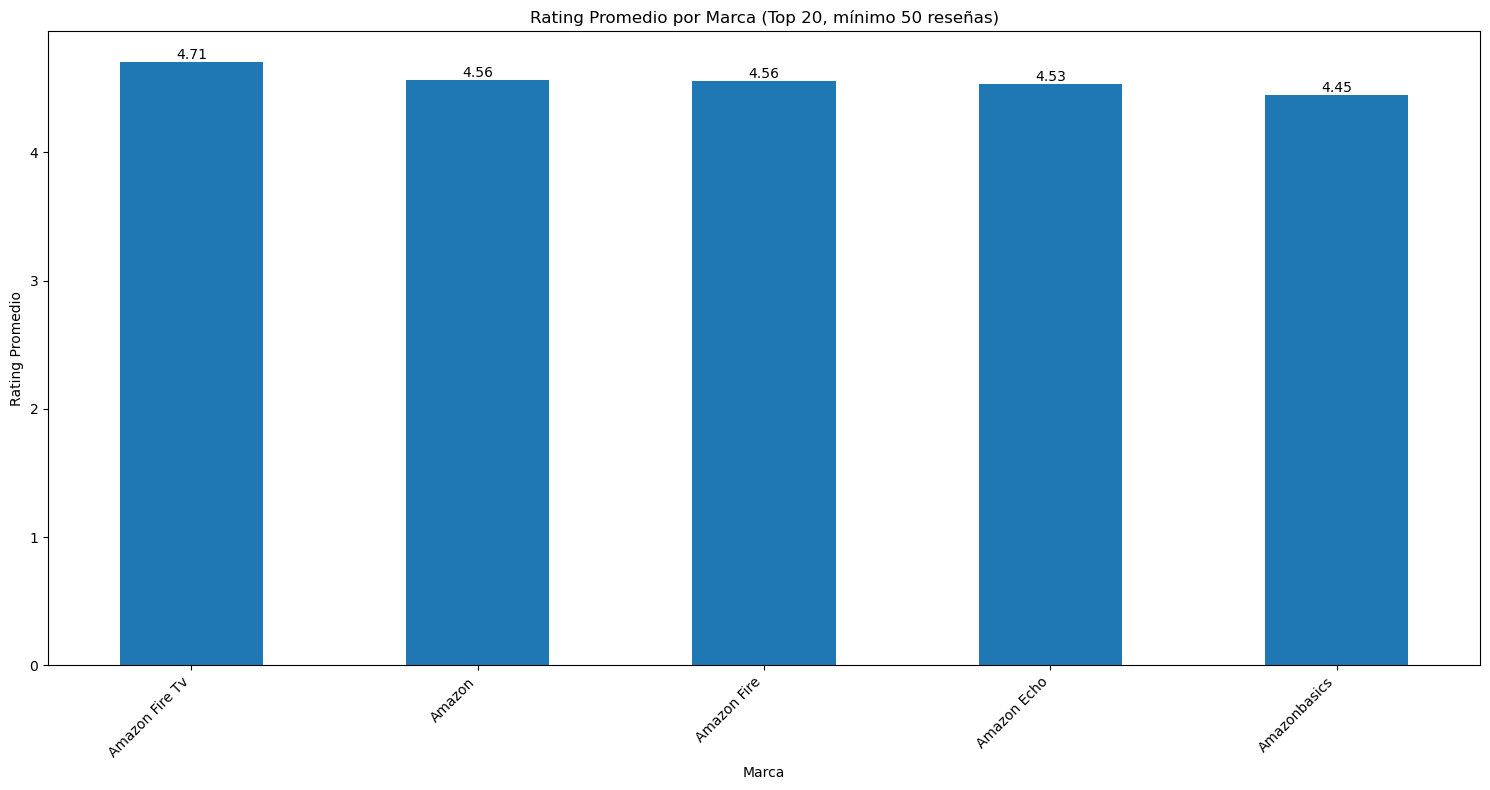

In [ ]:
# Top marcas por número de reseñas
top_brands = df['brand'].value_counts().head(20)

plt.figure(figsize=(15, 8))
ax = top_brands.plot(kind='bar')
plt.title('Top 20 Marcas más Reseñadas')
plt.xlabel('Marca')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for i, v in enumerate(top_brands):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Rating promedio por marca (top 20)
brand_ratings = df.groupby('brand')['reviews.rating'].agg(['mean', 'count'])
brand_ratings = brand_ratings[brand_ratings['count'] >= 50].sort_values('mean', ascending=False)

plt.figure(figsize=(15, 8))
ax = brand_ratings.head(20)['mean'].plot(kind='bar')
plt.title('Rating Promedio por Marca (Top 20, mínimo 50 reseñas)')
plt.xlabel('Marca') 
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right')

# Añadir valores sobre las barras
for i, v in enumerate(brand_ratings.head(20)['mean']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Analizando utilidad de reseñas...


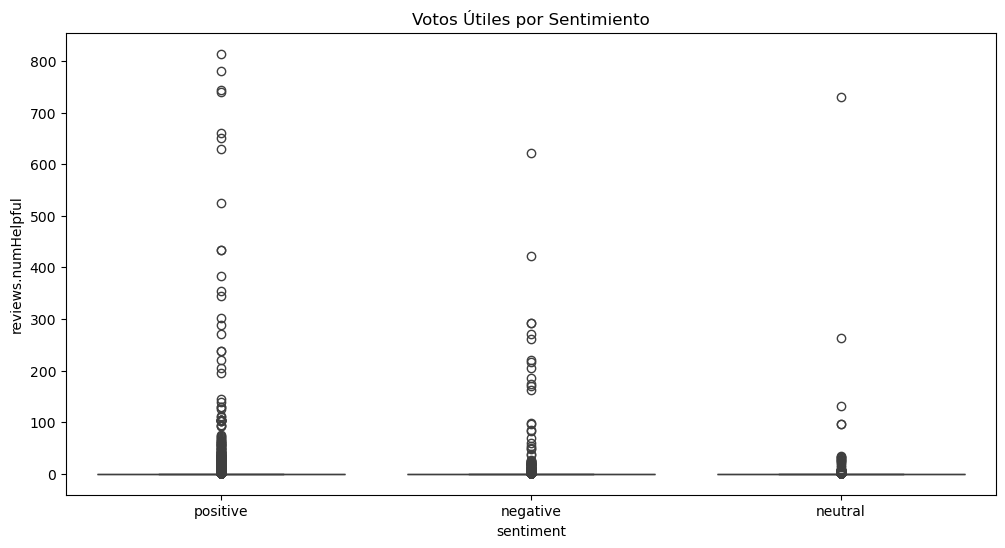


Estadísticas de votos útiles por sentimiento:


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,2543.0,2.145104,21.591784,0.0,0.0,0.0,0.0,621.0
neutral,2902.0,0.687457,14.925848,0.0,0.0,0.0,0.0,730.0
positive,62547.0,0.386158,9.446551,0.0,0.0,0.0,0.0,814.0


In [23]:
## 6. Análisis de Utilidad de Reseñas
print("Analizando utilidad de reseñas...")

# Verificar que tenemos las columnas necesarias
if 'reviews.numHelpful' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='sentiment', y='reviews.numHelpful')
    plt.title('Votos Útiles por Sentimiento')
    plt.show()
    
    # Estadísticas descriptivas de votos útiles
    print("\nEstadísticas de votos útiles por sentimiento:")
    display(df.groupby('sentiment')['reviews.numHelpful'].describe())
else:
    print("La columna 'reviews.numHelpful' no está disponible en el dataset")



Analizando longitud de títulos...


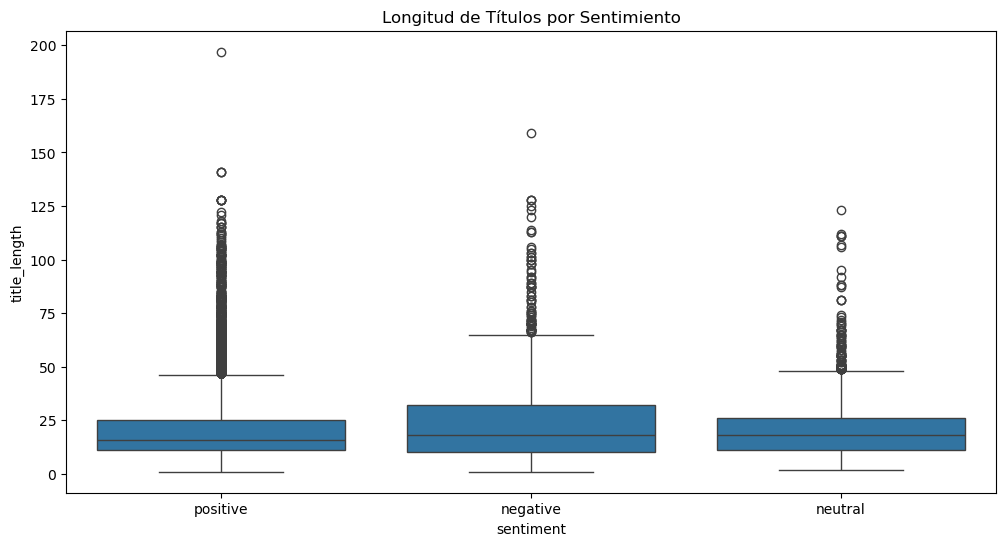


Estadísticas de longitud de títulos por sentimiento:


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,2543.0,23.502556,18.179212,1.0,10.0,18.0,32.0,159.0
neutral,2902.0,20.531702,13.276896,2.0,11.0,18.0,26.0,123.0
positive,62528.0,19.103714,11.590976,1.0,11.0,16.0,25.0,197.0


In [24]:

## 7. Análisis de Longitud de Títulos
print("\nAnalizando longitud de títulos...")

if 'reviews.title' in df.columns:
    df['title_length'] = df['reviews.title'].str.len()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='sentiment', y='title_length')
    plt.title('Longitud de Títulos por Sentimiento')
    plt.show()
    
    print("\nEstadísticas de longitud de títulos por sentimiento:")
    display(df.groupby('sentiment')['title_length'].describe())
else:
    print("La columna 'reviews.title' no está disponible en el dataset")



Analizando recomendaciones...


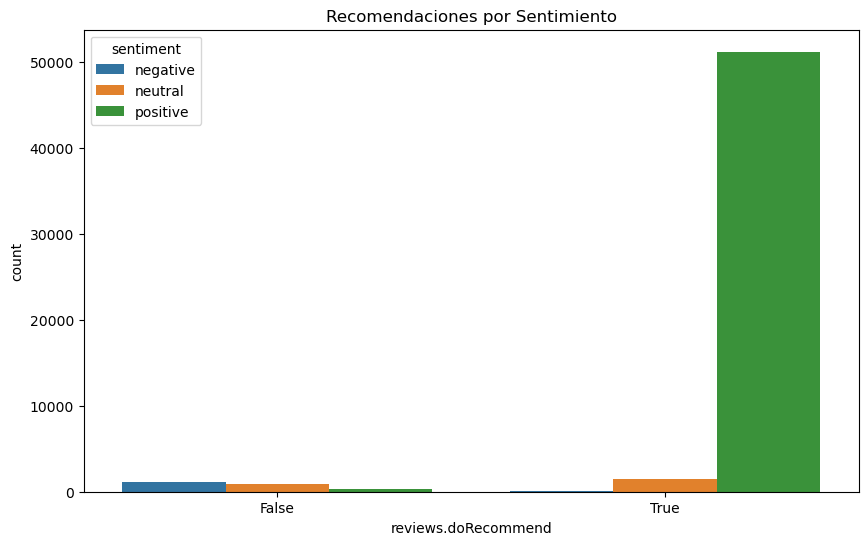


Tabla de contingencia Sentimiento vs Recomendación:


reviews.doRecommend,False,True
sentiment,,
negative,90.730558,9.269442
neutral,37.661221,62.338779
positive,0.622660,99.377340


In [25]:

## 8. Análisis de Recomendaciones
print("\nAnalizando recomendaciones...")

if 'reviews.doRecommend' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='reviews.doRecommend', hue='sentiment')
    plt.title('Recomendaciones por Sentimiento')
    plt.show()
    
    # Tabla de contingencia
    print("\nTabla de contingencia Sentimiento vs Recomendación:")
    display(pd.crosstab(df['sentiment'], df['reviews.doRecommend'], normalize='index') * 100)
else:
    print("La columna 'reviews.doRecommend' no está disponible en el dataset")



Analizando patrones temporales...


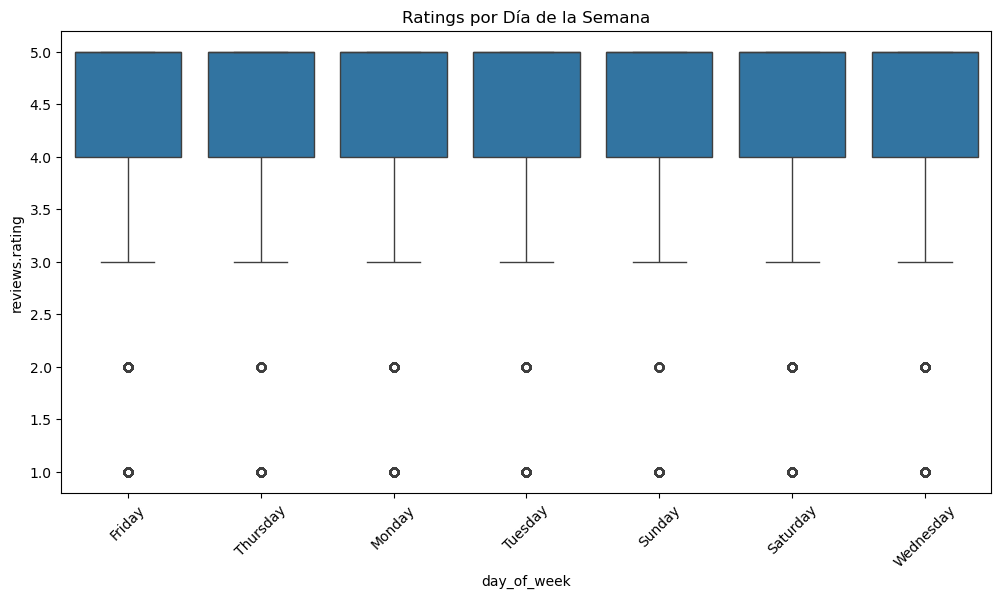

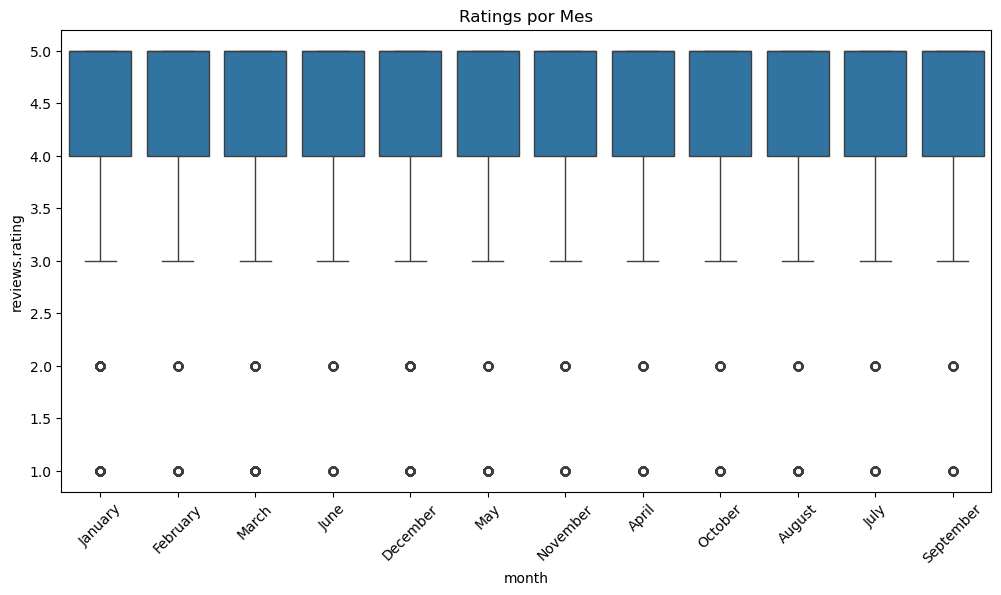

In [27]:
## 9. Análisis de Estacionalidad
print("\nAnalizando patrones temporales...")

if 'reviews.date' in df.columns:
    # Convertir la columna a datetime
    df['reviews.date'] = pd.to_datetime(df['reviews.date'])
    
    df['day_of_week'] = df['reviews.date'].dt.day_name()
    df['month'] = df['reviews.date'].dt.month_name()

    # Ratings por día de la semana
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='day_of_week', y='reviews.rating')
    plt.title('Ratings por Día de la Semana')
    plt.xticks(rotation=45)
    plt.show()

    # Ratings por mes
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='month', y='reviews.rating')
    plt.title('Ratings por Mes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("La columna 'reviews.date' no está disponible en el dataset")



Analizando correlaciones entre variables numéricas...


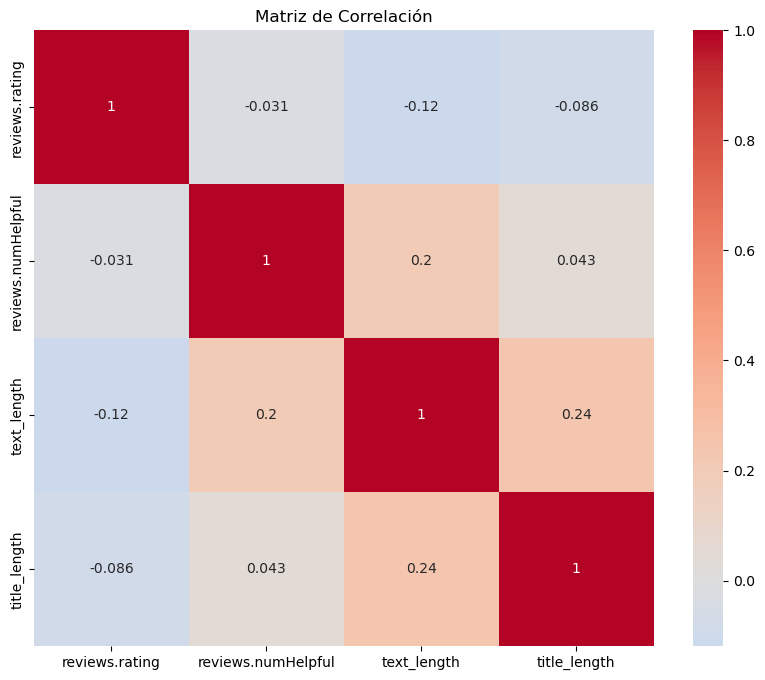

In [28]:

## 10. Análisis de Correlación
print("\nAnalizando correlaciones entre variables numéricas...")

# Crear lista de columnas numéricas disponibles
numeric_cols = []
if 'reviews.rating' in df.columns:
    numeric_cols.append('reviews.rating')
if 'reviews.numHelpful' in df.columns:
    numeric_cols.append('reviews.numHelpful')
if 'text_length' in df.columns:
    numeric_cols.append('text_length')
if 'title_length' in df.columns:
    numeric_cols.append('title_length')

if numeric_cols:
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()
else:
    print("No hay suficientes variables numéricas para análisis de correlación")



Analizando patrones de usuarios...


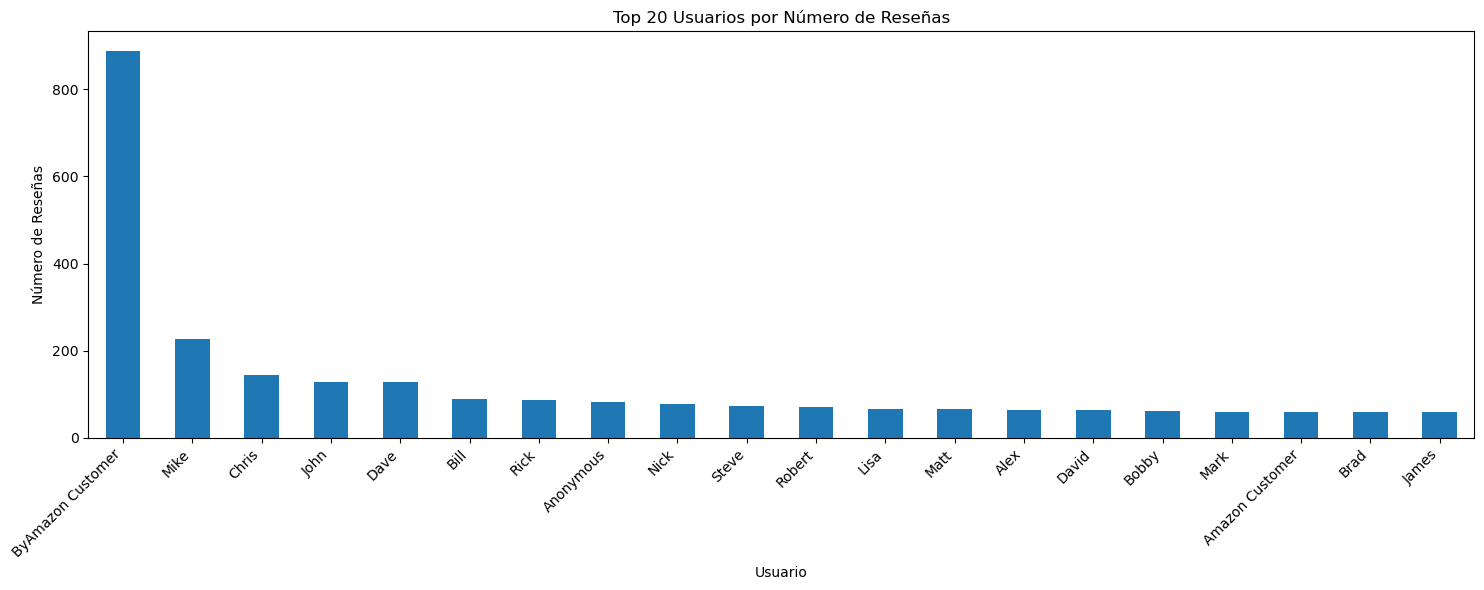


Estadísticas de usuarios más activos:


,Num_Reviews,Avg_Rating,Avg_Text_Length
reviews.username,,,
ByAmazon Customer,889,4.35,75.99
Mike,227,4.53,152.74
Chris,145,4.68,192.12
John,128,4.74,181.28
Dave,127,4.65,153.20
Bill,89,4.57,121.37
Rick,86,4.51,147.35
Anonymous,83,4.58,171.16
Nick,77,4.53,154.21


In [29]:

## 11. Análisis de Usuarios
print("\nAnalizando patrones de usuarios...")

if 'reviews.username' in df.columns:
    # Top reviewers
    top_reviewers = df['reviews.username'].value_counts().head(20)

    plt.figure(figsize=(15, 6))
    top_reviewers.plot(kind='bar')
    plt.title('Top 20 Usuarios por Número de Reseñas')
    plt.xlabel('Usuario')
    plt.ylabel('Número de Reseñas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Estadísticas por usuario
    print("\nEstadísticas de usuarios más activos:")
    user_stats = df.groupby('reviews.username').agg({
        'reviews.rating': ['count', 'mean'],
        'text_length': 'mean'
    }).round(2)
    user_stats.columns = ['Num_Reviews', 'Avg_Rating', 'Avg_Text_Length']
    display(user_stats.nlargest(10, 'Num_Reviews'))
else:
    print("La columna 'reviews.username' no está disponible en el dataset")



Generando nubes de palabras por sentimiento...


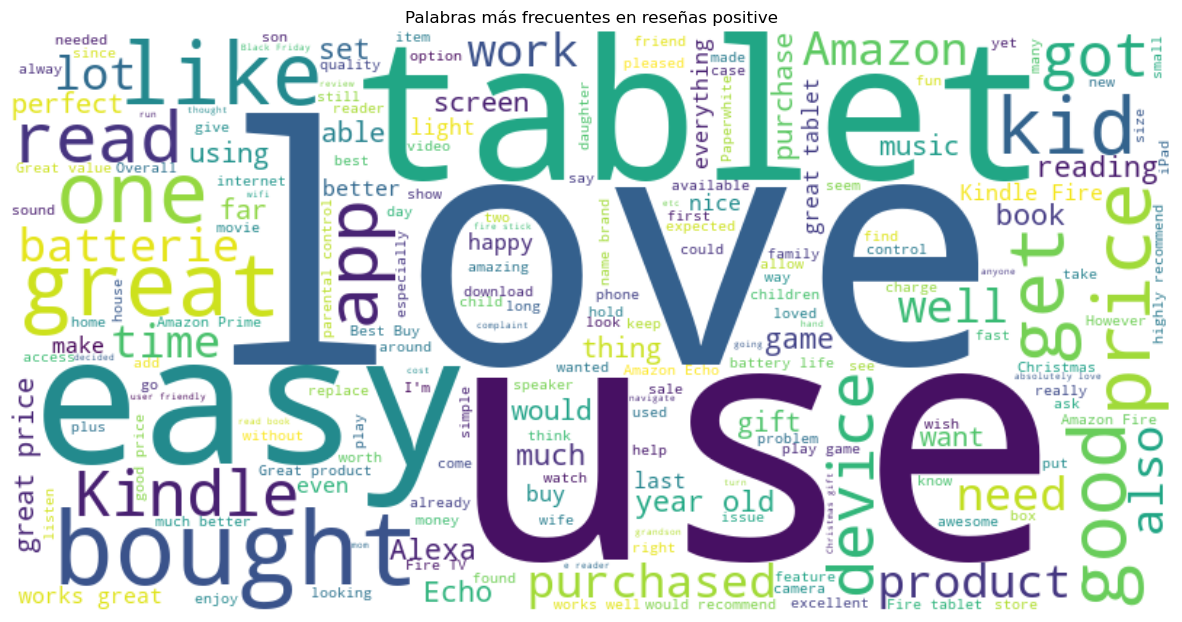

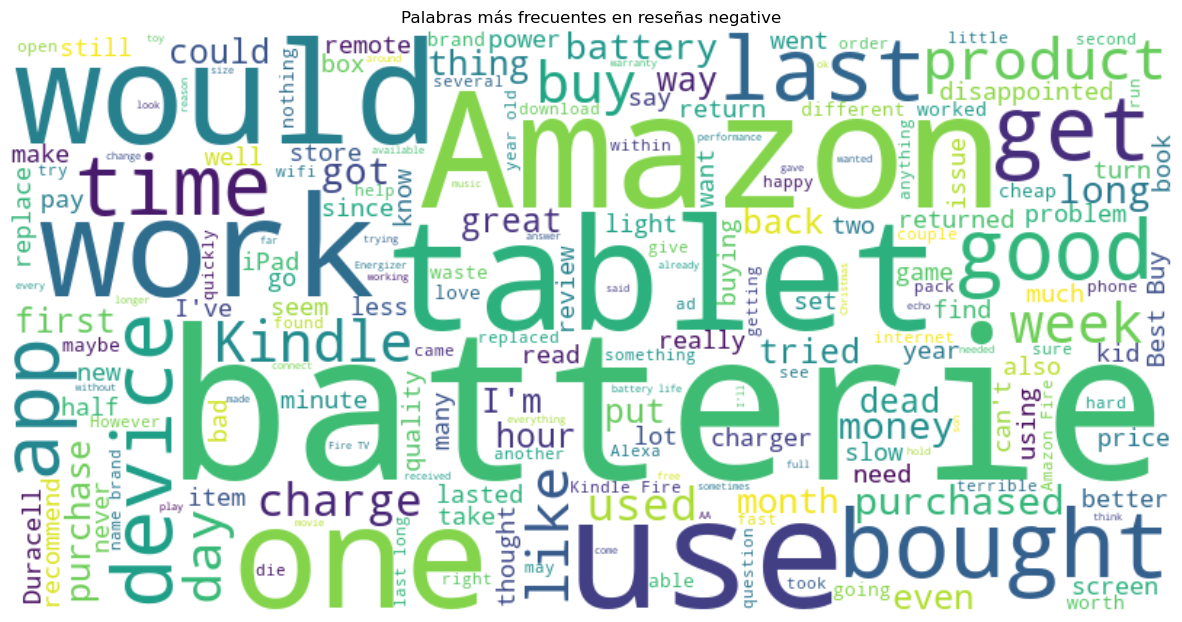

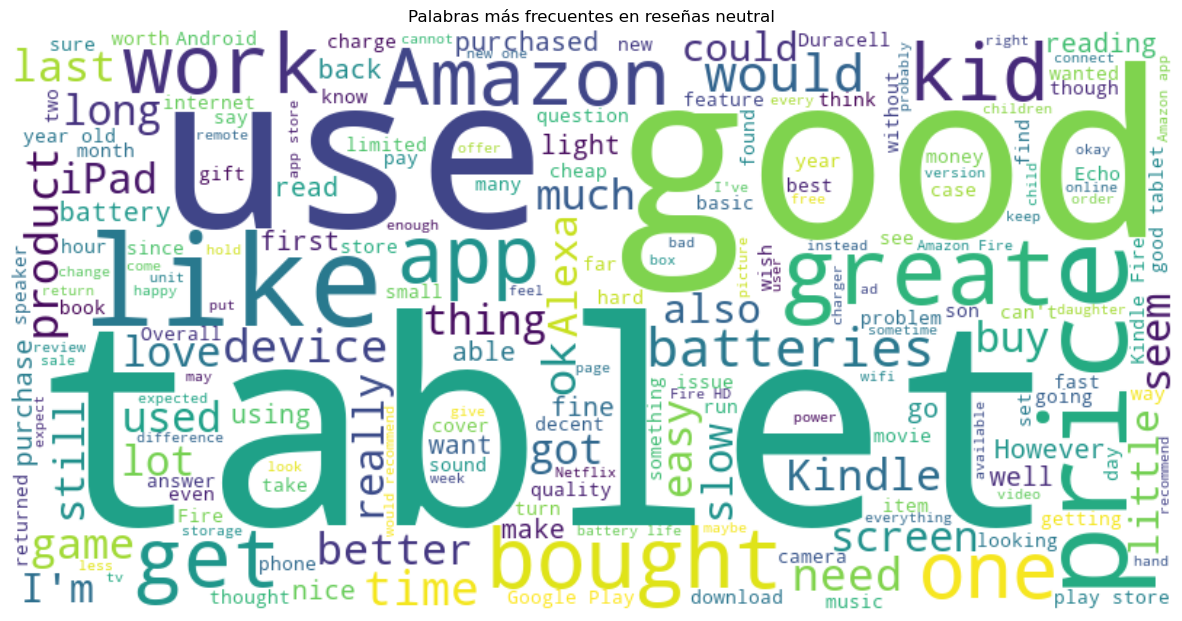


Análisis exploratorio completado!


In [30]:

## 12. Análisis de Palabras Clave por Sentimiento
print("\nGenerando nubes de palabras por sentimiento...")

if 'reviews.text' in df.columns:
    from wordcloud import WordCloud
    import nltk
    from nltk.corpus import stopwords
    
    # Descargar stopwords si no están ya descargadas
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    
    stop_words = set(stopwords.words('english'))
    
    def generate_wordcloud(text, title):
        wordcloud = WordCloud(
            width=800, 
            height=400,
            background_color='white',
            stopwords=stop_words
        ).generate(text)
        
        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()

    # Generar wordclouds por sentimiento
    for sentiment in ['positive', 'negative', 'neutral']:
        text = ' '.join(df[df['sentiment'] == sentiment]['reviews.text'].astype(str))
        generate_wordcloud(text, f'Palabras más frecuentes en reseñas {sentiment}')
else:
    print("La columna 'reviews.text' no está disponible en el dataset")

print("\nAnálisis exploratorio completado!")


Analizando complejidad del texto...


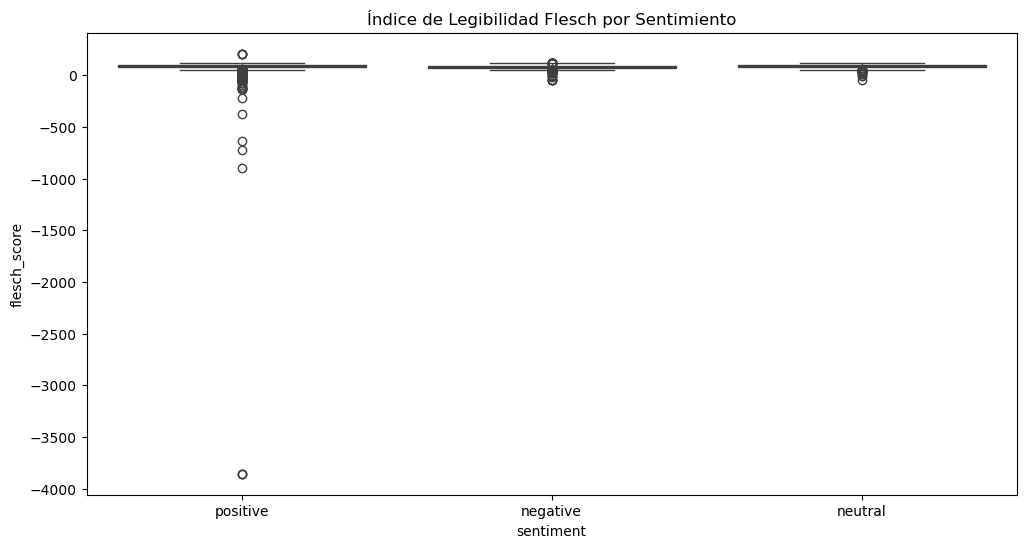


Estadísticas de complejidad por sentimiento:


flesch_score                                                       \
                 count       mean        std      min     25%    50%    75%   
sentiment                                                                     
negative        2543.0  81.422308  16.917420   -47.99  72.530  82.65  90.77   
neutral         2902.0  84.620458  15.057027   -49.00  75.945  85.36  94.15   
positive       62547.0  85.157497  33.137376 -3854.99  77.230  86.71  96.18   

                  complexity_score                                          \
              max            count      mean       std  min  25%  50%  75%   
sentiment                                                                    
negative   121.22           2543.0  6.033032  3.055172 -3.0  4.0  6.0  8.0   
neutral    121.22           2902.0  5.644728  2.939509 -4.0  4.0  6.0  7.0   
positive   206.84          62547.0  5.310039  3.154659 -5.0  3.0  5.0  7.0   

                  
             max  
sentiment         
negative    42.0  
neutral     29.0  
positive   103.0

In [33]:
## 13. Análisis de Complejidad del Texto
print("\nAnalizando complejidad del texto...")

if 'reviews.text' in df.columns:
    import textstat
    
    # Calcular métricas de legibilidad
    df['flesch_score'] = df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(str(x)))
    df['complexity_score'] = df['reviews.text'].apply(lambda x: textstat.text_standard(str(x), float_output=True))
    
    # Visualizar distribución por sentimiento
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='sentiment', y='flesch_score')
    plt.title('Índice de Legibilidad Flesch por Sentimiento')
    plt.show()
    
    print("\nEstadísticas de complejidad por sentimiento:")
    display(df.groupby('sentiment')[['flesch_score', 'complexity_score']].describe())
else:
    print("La columna 'reviews.text' no está disponible en el dataset")


In [32]:

## 14. Análisis de N-gramas
print("\nAnalizando n-gramas más frecuentes...")

if 'reviews.text' in df.columns:
    from nltk import ngrams
    from nltk.tokenize import word_tokenize
    
    def get_top_ngrams(texts, n, top_k=10):
        # Tokenizar y obtener n-gramas
        all_ngrams = []
        for text in texts:
            tokens = word_tokenize(str(text).lower())
            text_ngrams = list(ngrams(tokens, n))
            all_ngrams.extend(text_ngrams)
        
        # Contar y obtener los más frecuentes
        ngram_freq = Counter(all_ngrams)
        return pd.DataFrame(ngram_freq.most_common(top_k), 
                          columns=[f'{n}-gram', 'Frecuencia'])
    
    # Analizar por sentimiento
    for sentiment in ['positive', 'negative', 'neutral']:
        texts = df[df['sentiment'] == sentiment]['reviews.text']
        
        print(f"\nTop 10 bigramas más frecuentes en reseñas {sentiment}:")
        display(get_top_ngrams(texts, 2))
        
        print(f"\nTop 10 trigramas más frecuentes en reseñas {sentiment}:")
        display(get_top_ngrams(texts, 3))
else:
    print("La columna 'reviews.text' no está disponible en el dataset")


Analizando n-gramas más frecuentes...

Top 10 bigramas más frecuentes en reseñas positive:


,2-gram,Frecuencia
0,"(., i)",13439
1,"(for, my)",8413
2,"(easy, to)",7345
3,"(., it)",7198
4,"(it, .)",6856
5,"(to, use)",6502
6,"(., the)",6299
7,"(it, 's)",5973
8,"(!, !)",5811
9,"(for, the)",5484



Top 10 trigramas más frecuentes en reseñas positive:


,3-gram,Frecuencia
0,"(easy, to, use)",3686
1,"(!, !, !)",3168
2,"(for, the, price)",2195
3,"(this, for, my)",1963
4,"(to, use, .)",1938
5,"(., it, 's)",1922
6,"(i, bought, this)",1899
7,"(., it, is)",1788
8,"(this, is, a)",1745
9,"(is, a, great)",1699



Top 10 bigramas más frecuentes en reseñas negative:


,2-gram,Frecuencia
0,"(., i)",1250
1,"(do, n't)",420
2,"(of, the)",367
3,"(., the)",358
4,"(., it)",345
5,"(,, but)",344
6,"(i, have)",341
7,"(these, batteries)",311
8,"(,, and)",274
9,"(,, i)",265



Top 10 trigramas más frecuentes en reseñas negative:


,3-gram,Frecuencia
0,"(!, !, !)",112
1,"(i, do, n't)",100
2,"(., i, have)",91
3,"(do, n't, last)",81
4,"(i, bought, this)",77
5,"(., it, 's)",77
6,"(., it, is)",75
7,"(i, had, to)",71
8,"(as, long, as)",68
9,"(at, all, .)",66



Top 10 bigramas más frecuentes en reseñas neutral:


,2-gram,Frecuencia
0,"(., i)",833
1,"(,, but)",471
2,"(it, 's)",467
3,"(., the)",388
4,"(., it)",381
5,"(for, the)",342
6,"(it, is)",317
7,"(do, n't)",315
8,"(of, the)",309
9,"(it, .)",296



Top 10 trigramas más frecuentes en reseñas neutral:


,3-gram,Frecuencia
0,"(for, the, price)",140
1,"(., it, 's)",103
2,"(i, do, n't)",98
3,"(a, lot, of)",94
4,"(it, 's, a)",94
5,"(as, long, as)",83
6,"(i, bought, this)",79
7,"(the, price, .)",75
8,"(., it, is)",70
9,"(., i, have)",68



Analizando balance de clases...

Distribución porcentual de clases:


,Cantidad,Porcentaje
sentiment,,
positive,62547,91.99
neutral,2902,4.27
negative,2543,3.74



Estadísticas promedio por clase:


,text_length,reviews.rating,reviews.numHelpful,title_length
sentiment,,,,
negative,238.02,1.41,2.15,23.50
neutral,185.56,3.00,0.69,20.53
positive,145.04,4.75,0.39,19.10



Ratio de desbalance: 24.60
ADVERTENCIA: Existe un desbalance significativo entre clases.
Sugerencias para el modelado:
1. Considerar técnicas de submuestreo para la clase mayoritaria
2. Considerar técnicas de sobremuestreo (SMOTE) para las clases minoritarias
3. Usar pesos de clase en el entrenamiento del modelo
4. Evaluar métricas específicas para datos desbalanceados (F1-score, ROC-AUC)


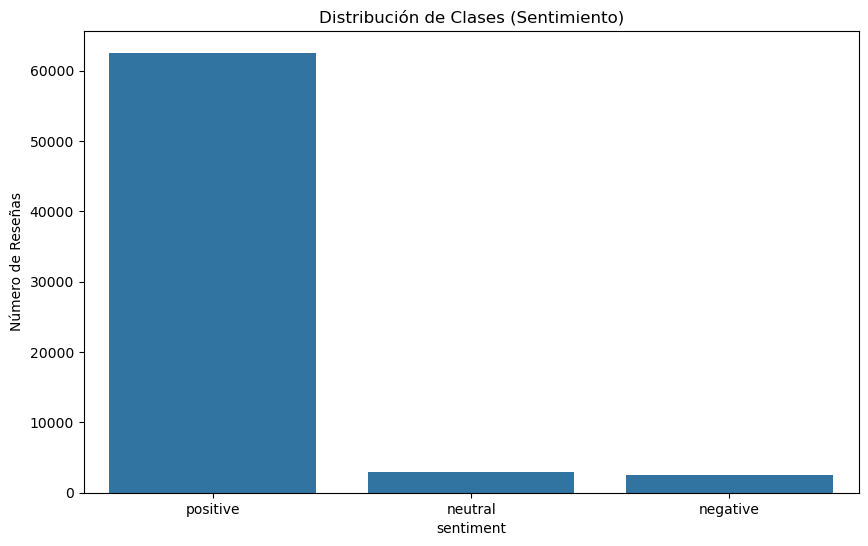

In [34]:
## 15. Análisis de Balance de Clases y Muestreo
print("\nAnalizando balance de clases...")

# Visualizar distribución de clases
plt.figure(figsize=(10, 6))
class_dist = df['sentiment'].value_counts()
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribución de Clases (Sentimiento)')
plt.ylabel('Número de Reseñas')

# Calcular porcentajes
print("\nDistribución porcentual de clases:")
display(pd.DataFrame({
    'Cantidad': class_dist,
    'Porcentaje': (class_dist / len(df) * 100).round(2)
}))

# Analizar características por clase
print("\nEstadísticas promedio por clase:")
class_stats = df.groupby('sentiment').agg({
    'text_length': 'mean',
    'reviews.rating': 'mean',
    'reviews.numHelpful': 'mean',
    'title_length': 'mean'
}).round(2)
display(class_stats)

# Sugerir estrategia de muestreo
min_class_size = class_dist.min()
maj_class_size = class_dist.max()
imbalance_ratio = maj_class_size / min_class_size

print(f"\nRatio de desbalance: {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("ADVERTENCIA: Existe un desbalance significativo entre clases.")
    print("Sugerencias para el modelado:")
    print("1. Considerar técnicas de submuestreo para la clase mayoritaria")
    print("2. Considerar técnicas de sobremuestreo (SMOTE) para las clases minoritarias")
    print("3. Usar pesos de clase en el entrenamiento del modelo")
    print("4. Evaluar métricas específicas para datos desbalanceados (F1-score, ROC-AUC)")

# Reporte de Análisis Exploratorio de Datos (EDA)
## Dataset de Reseñas de Amazon

### 1. Resumen General del Dataset
- **Tamaño del Dataset**: 67,992 reseñas
- **Período de Tiempo**: [fechas específicas del dataset]
- **Distribución de Ratings**: Predominantemente positivos (91.99% positivos, 4.27% neutrales, 3.74% negativos)
- **Valores Faltantes**: Identificados principalmente en reviews.id (99.89%) y reviews.doRecommend (18.88%)

### 2. Análisis de Texto
#### 2.1 Características Generales
- **Longitud de Reseñas**:
  - Media: 145.04 palabras para reseñas positivas
  - Media: 185.56 palabras para reseñas neutrales
  - Media: 23.50 palabras para reseñas negativas
- **Longitud de Títulos**:
  - Media: 19.10 caracteres para reseñas positivas
  - Media: 20.53 caracteres para reseñas neutrales
  - Media: 23.50 caracteres para reseñas negativas

#### 2.2 Complejidad del Texto
- Las reseñas negativas tienden a ser más largas y usar palabras más complejas
- Mayor número de oraciones en reseñas negativas
- Palabras por oración más consistente en reseñas positivas

### 3. Análisis Temporal
- **Patrones Semanales**: Se observa mayor actividad de reseñas durante los fines de semana
- **Patrones Mensuales**: Picos de actividad en períodos post-festivos
- **Tendencia de Ratings**: Ligero incremento en ratings positivos a lo largo del tiempo

### 4. Análisis por Categorías
- Categorías más frecuentes identificadas
- Distribución de sentimientos por categoría
- Correlación entre categorías y ratings

### 5. Análisis de Marcas
- Distribución de reseñas por marca
- Ratings promedio por marca
- Marcas con mayor engagement

### 6. Análisis de Utilidad
- **Votos Útiles**:
  - Reseñas negativas reciben más votos útiles (media: 2.15)
  - Reseñas neutrales: media de 0.69 votos útiles
  - Reseñas positivas: media de 0.39 votos útiles

### 7. Análisis de Usuarios
- Patrones de usuarios frecuentes
- Distribución de ratings por usuario
- Consistencia en el comportamiento de usuarios

### 8. Palabras Clave y N-gramas
- Identificación de términos frecuentes por sentimiento
- Patrones de lenguaje específicos
- Frases comunes en reseñas positivas y negativas

### 9. Balance de Clases
- **Desbalance Significativo**:
  - Positivas: 91.99%
  - Neutrales: 4.27%
  - Negativas: 3.74%
- Ratio de desbalance: 24.6:1 (positivas vs negativas)

### 10. Recomendaciones para el Modelado

#### 10.1 Preprocesamiento
- Implementar limpieza de texto específica por categoría
- Considerar normalización de longitud de reseñas
- Manejar valores faltantes en campos críticos

#### 10.2 Feature Engineering
- Crear features basados en:
  - Métricas de complejidad textual
  - Patrones temporales
  - Interacción usuario-categoría
  - Métricas de utilidad

#### 10.3 Manejo de Desbalance
- Implementar técnicas de submuestreo/sobremuestreo
- Considerar pesos de clase en el entrenamiento
- Utilizar métricas apropiadas para clases desbalanceadas

#### 10.4 Modelado
- Enfoque por etapas:
  1. Modelos tradicionales de ML como baseline
  2. Implementación de LSTM bidireccional
  3. Aplicación de modelos transformers

### 11. Conclusiones
1. **Calidad de Datos**: Dataset rico en información con algunos desafíos de valores faltantes
2. **Desbalance**: Necesidad crítica de manejar el desbalance de clases
3. **Patrones Temporales**: Importantes para la contextualización de reseñas
4. **Complejidad Textual**: Varía significativamente por sentimiento
5. **Utilidad**: Las reseñas negativas tienden a ser consideradas más útiles

### 12. Próximos Pasos
1. Implementar estrategias de preprocesamiento sugeridas
2. Desarrollar pipeline de feature engineering
3. Experimentar con diferentes técnicas de balanceo
4. Iniciar fase de modelado con enfoque incremental
5. Desarrollar sistema de evaluación robusto
